
PART 3: CORRUPT IMAGE DETECTION
Using PCA with 90 components
Expected corrupted images: 89 out of 405

Threshold (based on 98th percentile): 1624.90
Training error range: 138.76 - 2393.20
Training error mean: 834.25 ± 350.29

✓ Detected 96 corrupted images
Detection rate: 107.9% (if all 89 are found)


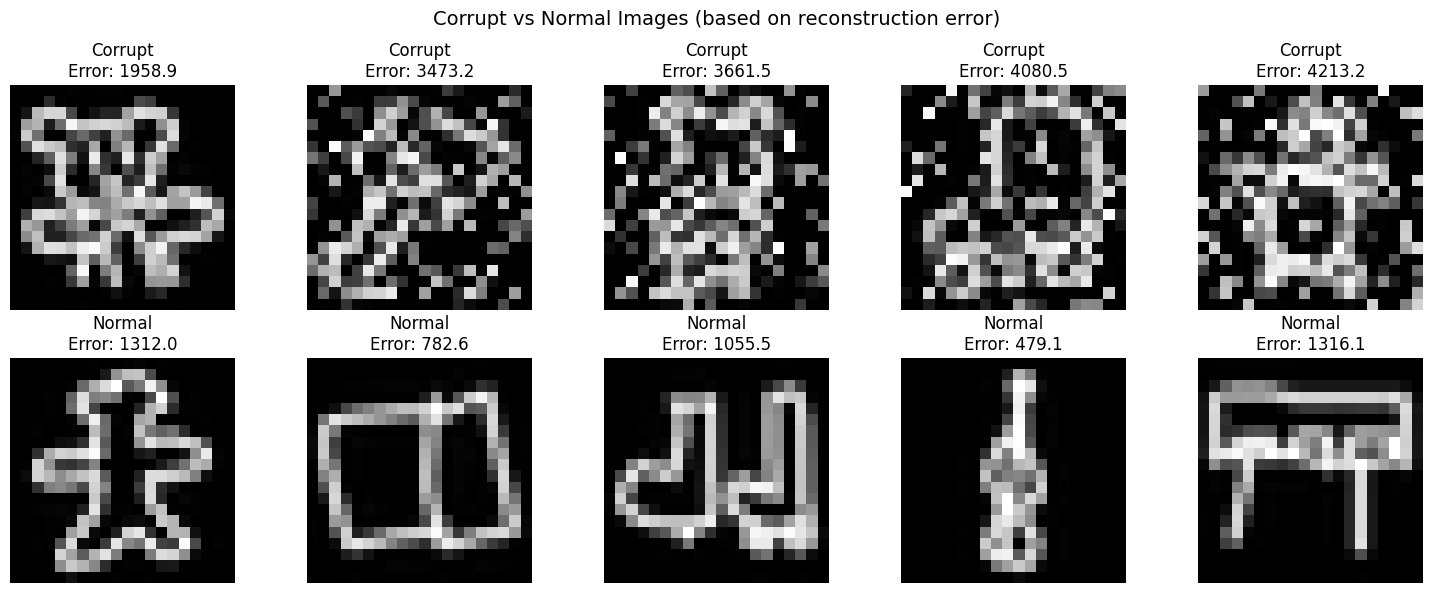

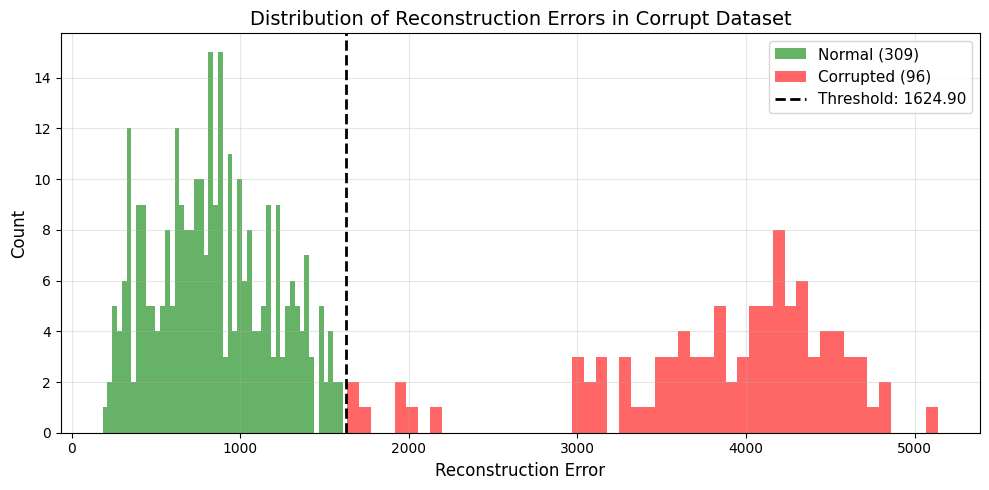

Results saved to 'part3_corrupt_detection.npz'


In [ ]:
# PART 3: CORRUPT IMAGE DETECTION
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def detect_corrupt_images(X_train, X_corrupt, n_components=50, percentile=95):
    print("\n" + "="*60)
    print("PART 3: CORRUPT IMAGE DETECTION")
    print("="*60)
    print(f"Using PCA with {n_components} components")
    print(f"Expected corrupted images: 89 out of {len(X_corrupt)}")
    
    # first step is to fit PCA on training data (normal images only)
    pca = PCA(n_components=n_components, random_state=42)
    pca.fit(X_train)
    
    # then we calculate the reconstruction error for training data 
    X_train_transformed = pca.transform(X_train)
    X_train_reconstructed = pca.inverse_transform(X_train_transformed)
    train_errors = np.mean((X_train - X_train_reconstructed) ** 2, axis=1)
    
    #  we set threshold based on training data distribution
    threshold = np.percentile(train_errors, percentile)
    print(f"\nThreshold (based on {percentile}th percentile): {threshold:.2f}")
    print(f"Training error range: {train_errors.min():.2f} - {train_errors.max():.2f}")
    print(f"Training error mean: {train_errors.mean():.2f} ± {train_errors.std():.2f}")
    
    # calculate reconstruction error for corrupt dataset
    X_corrupt_transformed = pca.transform(X_corrupt)
    X_corrupt_reconstructed = pca.inverse_transform(X_corrupt_transformed)
    corrupt_errors = np.mean((X_corrupt - X_corrupt_reconstructed) ** 2, axis=1)
    
    # finally identify corrupted images --> those above threshold
    is_corrupted = corrupt_errors > threshold
    n_detected = np.sum(is_corrupted)
    
    print(f"\n✓ Detected {n_detected} corrupted images")
    print(f"Detection rate: {100*n_detected/89:.1f}% (if all 89 are found)")
    
    return is_corrupted, corrupt_errors, threshold, pca

def visualize_corrupt_detection(X_corrupt, is_corrupted, corrupt_errors, threshold): #in order to see and compare the results (normal vs corrupted)
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    
    corrupted_indices = np.where(is_corrupted)[0]
    normal_indices = np.where(~is_corrupted)[0]
    
    # top row is showing detected corrupted images
    for i in range(5):
        if i < len(corrupted_indices):
            idx = corrupted_indices[i]
            axes[0, i].imshow(X_corrupt[idx].reshape(20, 20), cmap='gray', vmin=0, vmax=255)
            axes[0, i].set_title(f'Corrupt\nError: {corrupt_errors[idx]:.1f}')
        axes[0, i].axis('off')
    
    # bottom row shows normal images
    for i in range(5):
        if i < len(normal_indices):
            idx = normal_indices[i]
            axes[1, i].imshow(X_corrupt[idx].reshape(20, 20), cmap='gray', vmin=0, vmax=255)
            axes[1, i].set_title(f'Normal\nError: {corrupt_errors[idx]:.1f}')
        axes[1, i].axis('off')
    
    plt.suptitle('Corrupt vs Normal Images (based on reconstruction error)', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # plot histogram of reconstruction errors
    plt.figure(figsize=(10, 5))
    
    corrupted_errors = corrupt_errors[is_corrupted]
    normal_errors = corrupt_errors[~is_corrupted]
    
    plt.hist(normal_errors, bins=50, alpha=0.6, label=f'Normal ({len(normal_errors)})', color='green')
    plt.hist(corrupted_errors, bins=50, alpha=0.6, label=f'Corrupted ({len(corrupted_errors)})', color='red')
    plt.axvline(threshold, color='black', linestyle='--', linewidth=2, label=f'Threshold: {threshold:.2f}')
    
    plt.xlabel('Reconstruction Error', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title('Distribution of Reconstruction Errors in Corrupt Dataset', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# MAIN
if __name__ == "__main__":
    dataset = np.load("dataset.npz")
    X_train, y_train = dataset["X"], dataset["y"]
    dataset_corrupt = np.load("dataset_corrupted.npz")
    X_corrupt = dataset_corrupt["X"]
    
    is_corrupted, corrupt_errors, threshold, pca = detect_corrupt_images(
        X_train, X_corrupt, 
        n_components=90,  # later this values are going to be tuned in the range of 30-100
        percentile=98      # later this values are going to be tuned in the range of 90-98
    )
    
    
    visualize_corrupt_detection(X_corrupt, is_corrupted, corrupt_errors, threshold)
    
    # save results to see them later
    results = {
        'is_corrupted': is_corrupted,
        'reconstruction_errors': corrupt_errors,
        'threshold': threshold,
        'n_detected': np.sum(is_corrupted)
    }
    np.savez('part3_corrupt_detection.npz', **results)
    print("Results saved to 'part3_corrupt_detection.npz'")


=== Testing PCA=30, Percentile=90 ===

PART 3: CORRUPT IMAGE DETECTION
Using PCA with 30 components
Expected corrupted images: 89 out of 405

Threshold (based on 90th percentile): 3071.63
Training error range: 289.65 - 4698.57
Training error mean: 2060.60 ± 804.88

✓ Detected 128 corrupted images
Detection rate: 143.8% (if all 89 are found)

=== Testing PCA=30, Percentile=94 ===

PART 3: CORRUPT IMAGE DETECTION
Using PCA with 30 components
Expected corrupted images: 89 out of 405

Threshold (based on 94th percentile): 3261.83
Training error range: 289.65 - 4698.57
Training error mean: 2060.60 ± 804.88

✓ Detected 113 corrupted images
Detection rate: 127.0% (if all 89 are found)

=== Testing PCA=30, Percentile=96 ===

PART 3: CORRUPT IMAGE DETECTION
Using PCA with 30 components
Expected corrupted images: 89 out of 405

Threshold (based on 96th percentile): 3400.60
Training error range: 289.65 - 4698.57
Training error mean: 2060.60 ± 804.88

✓ Detected 106 corrupted images
Detection rat

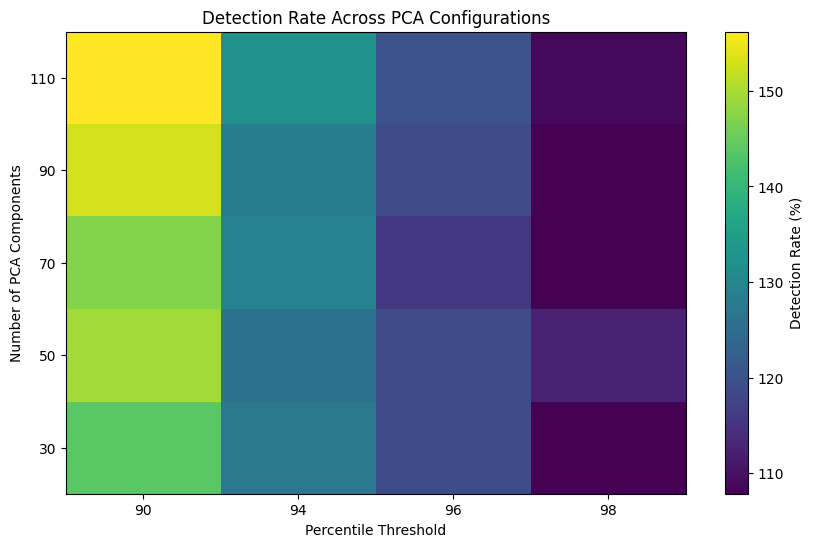

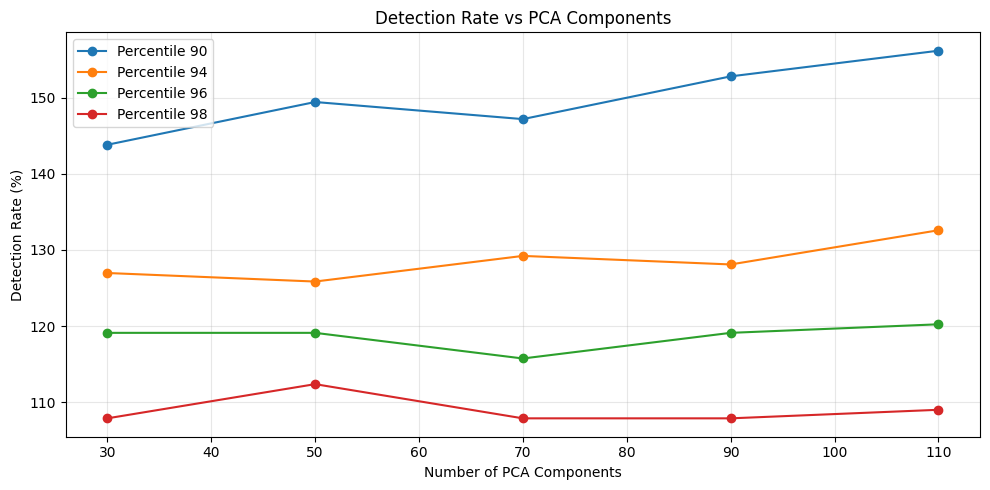


All results saved to 'part3b_parameter_results.npz'


In [ ]:
# PART 3B: In this part we are going to explore the parameters of PCA for corrupt image detection ( number of components and percentile threshold) to see and understand which are the best ones and how they affect the detection rate.
import numpy as np
import matplotlib.pyplot as plt

def test_pca_parameters(X_train, X_corrupt, component_values, percentile_values):
    results = []

    for n_components in component_values:
        for percentile in percentile_values:
            print(f"\n=== Testing PCA={n_components}, Percentile={percentile} ===")
            is_corrupted, corrupt_errors, threshold, pca = detect_corrupt_images(
                X_train, X_corrupt,
                n_components=n_components,
                percentile=percentile
            )

            n_detected = np.sum(is_corrupted)
            detection_rate = 100 * n_detected / 89  # 89 known corrupt images

            results.append({
                'n_components': n_components,
                'percentile': percentile,
                'threshold': threshold,
                'n_detected': n_detected,
                'detection_rate': detection_rate
            })

    return results


def plot_results(results):
    """Plot detection rate as heatmap and summary charts."""
    import pandas as pd
    results_df = pd.DataFrame(results)

    pivot = results_df.pivot(index='n_components', columns='percentile', values='detection_rate')

    # we are going to first plot a heatmap of detection rates
    plt.figure(figsize=(10, 6))
    plt.imshow(pivot, cmap='viridis', origin='lower', aspect='auto')
    plt.colorbar(label='Detection Rate (%)')
    plt.xticks(range(len(pivot.columns)), pivot.columns)
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.xlabel('Percentile Threshold')
    plt.ylabel('Number of PCA Components')
    plt.title('Detection Rate Across PCA Configurations')
    plt.show()

    # line plot for better visual comparison
    plt.figure(figsize=(10, 5))
    for percentile in sorted(results_df['percentile'].unique()):
        subset = results_df[results_df['percentile'] == percentile]
        plt.plot(subset['n_components'], subset['detection_rate'], marker='o', label=f'Percentile {percentile}')
    
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Detection Rate (%)')
    plt.title('Detection Rate vs PCA Components')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    dataset = np.load("dataset.npz") #normal dataset
    X_train, y_train = dataset["X"], dataset["y"]
    dataset_corrupt = np.load("dataset_corrupted.npz") #corrupted dataset
    X_corrupt = dataset_corrupt["X"]

    # we define all the different values to test of both variables
    component_values = [30, 50, 70, 90, 110]
    percentile_values = [90, 94, 96, 98]


    results = test_pca_parameters(X_train, X_corrupt, component_values, percentile_values)
    plot_results(results)

    # we are going to save results to file to check the visuals
    np.savez("part3b_parameter_results.npz", results=results)
    print("\nAll results saved to 'part3b_parameter_results.npz'")
